<a href="https://colab.research.google.com/github/RizGitComp/Kelompok_IMK/blob/main/student_stress_levels_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Stress Levels Classification

# Data Preparation

## Import Libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve

## Upload Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving student_stress_levels.csv to student_stress_levels (1).csv


## Display Dataset

In [ ]:
df = pd.read_csv("/content/student_stress_levels.csv")
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


## Describing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


## Check for Missing Values

In [ ]:
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


## Check for Outliers

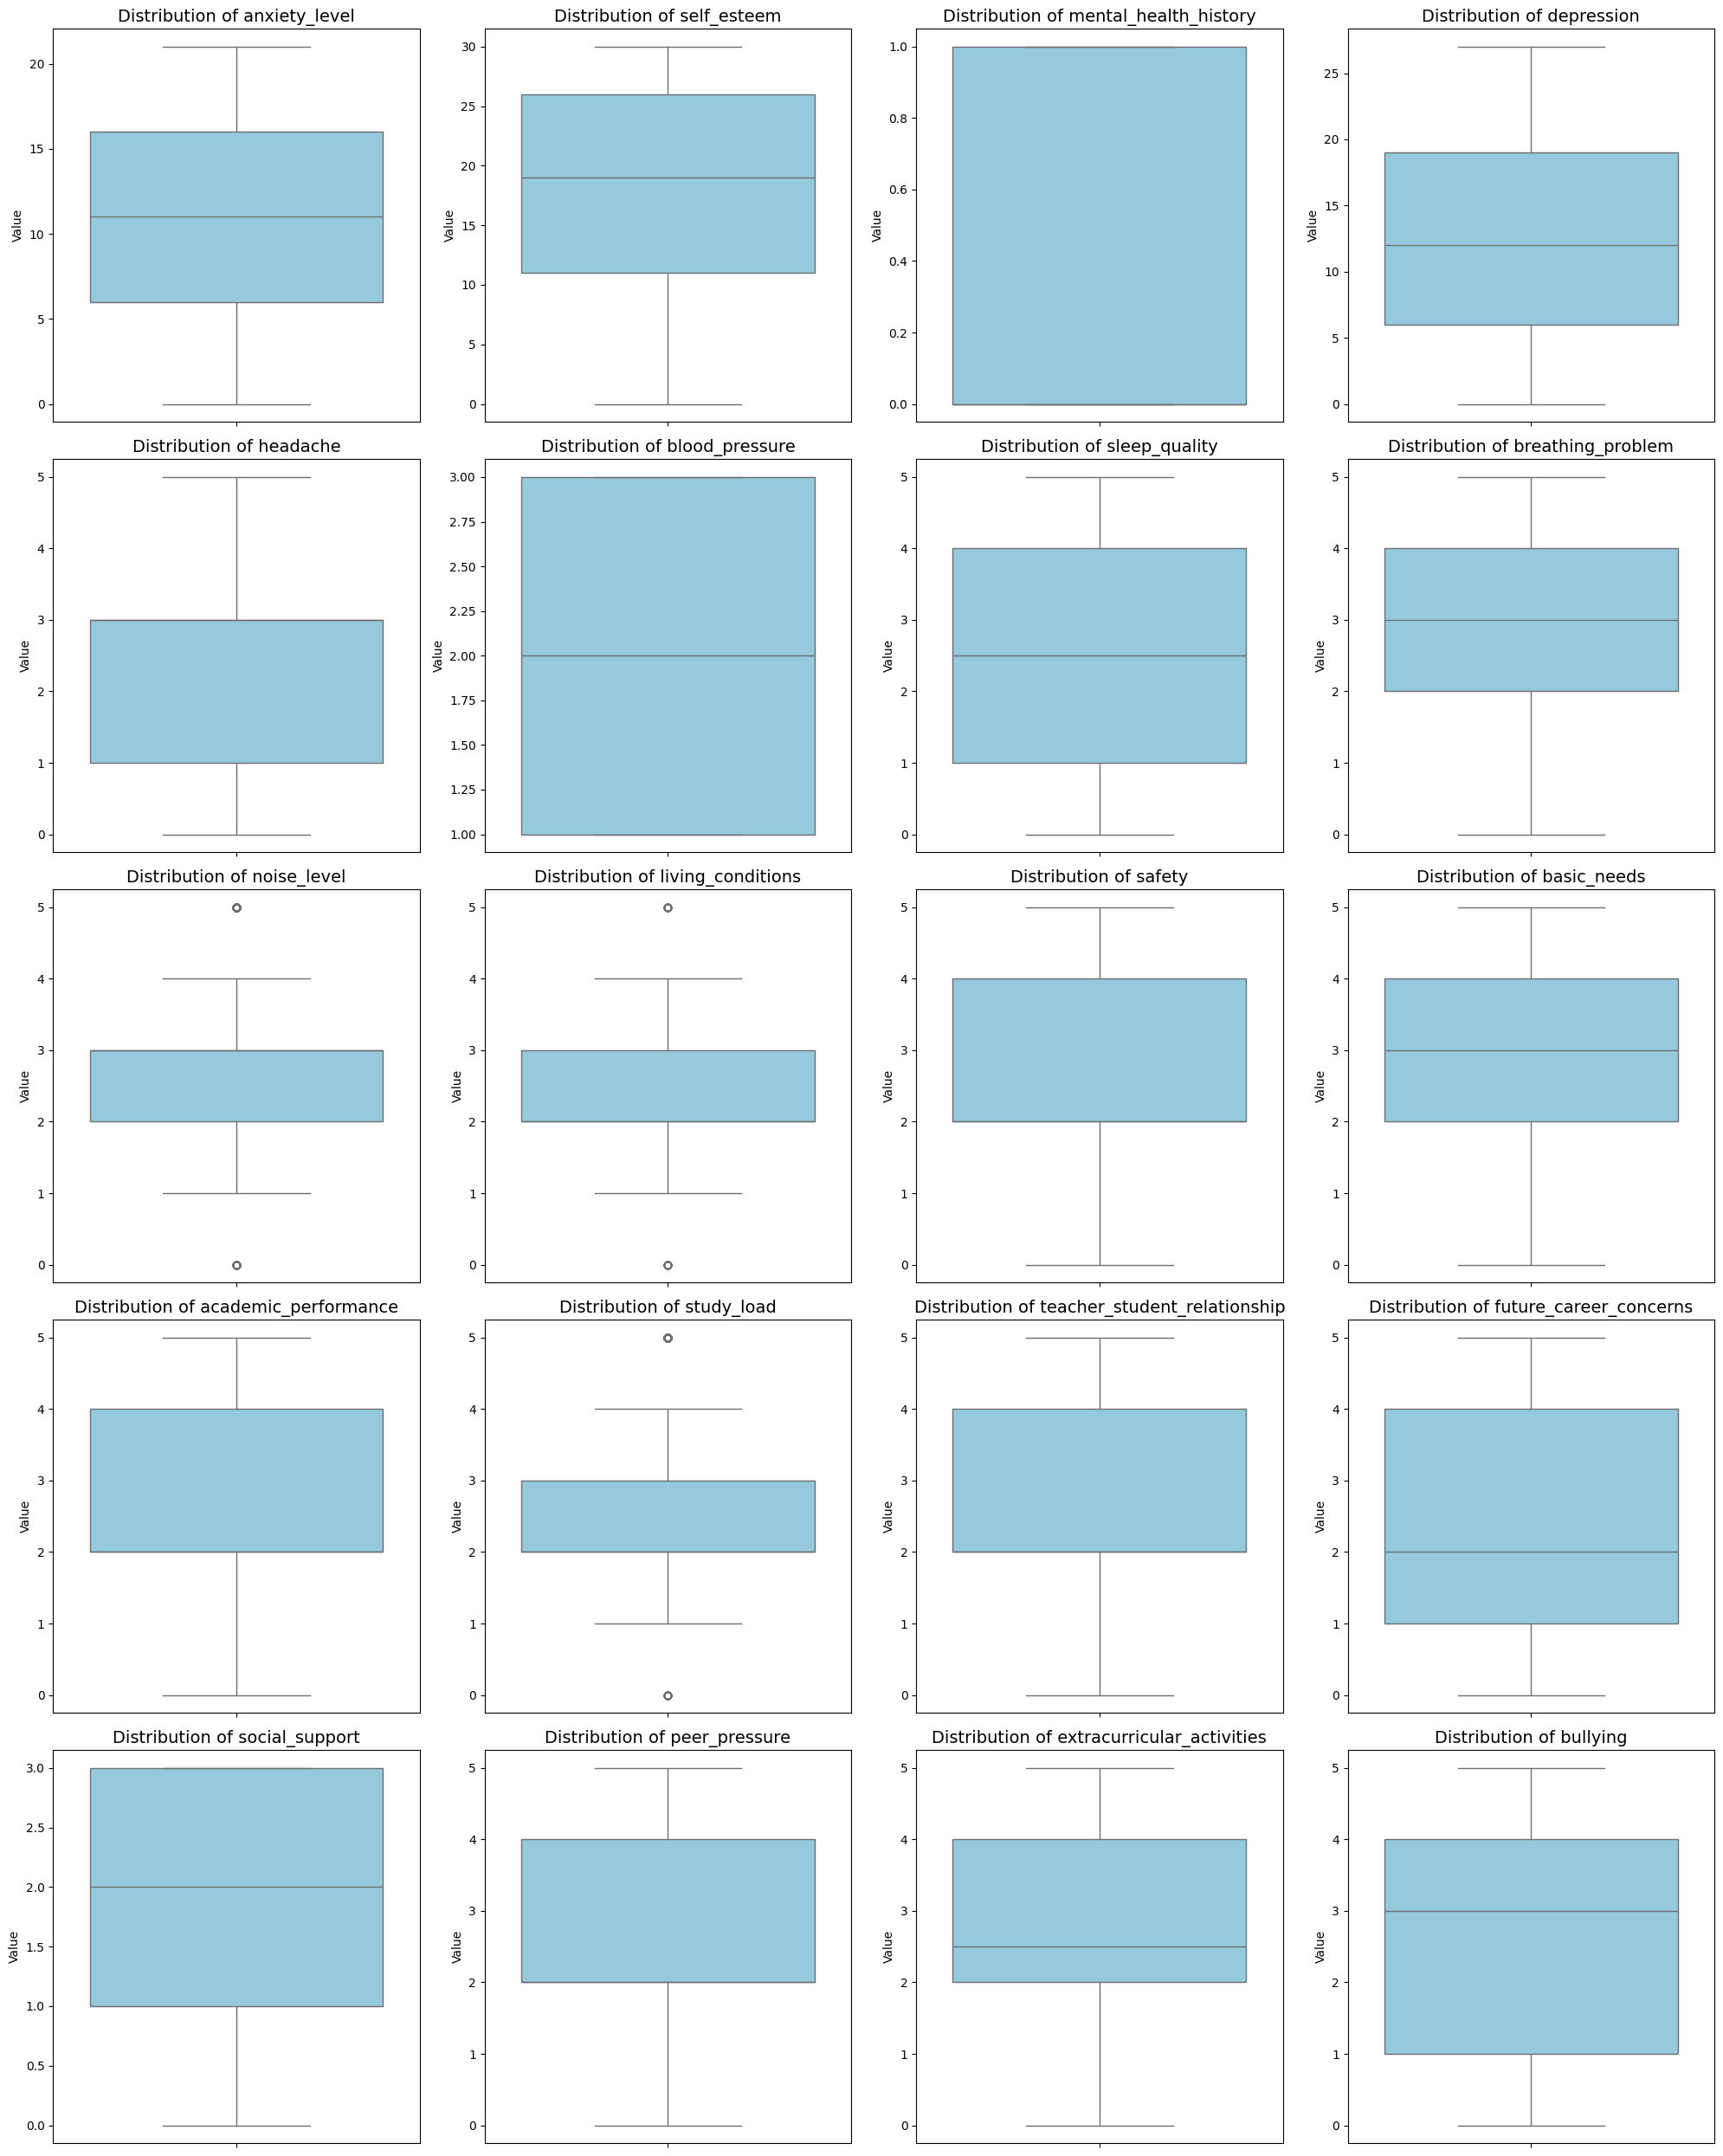


=== Number of Outliers per Column (IQR Method) ===

Column Name                    | Outliers   | Percentage
------------------------------------------------------------
anxiety_level                  | 0          | 0.00%
self_esteem                    | 0          | 0.00%
mental_health_history          | 0          | 0.00%
depression                     | 0          | 0.00%
headache                       | 0          | 0.00%
blood_pressure                 | 0          | 0.00%
sleep_quality                  | 0          | 0.00%
breathing_problem              | 0          | 0.00%
noise_level                    | 173        | 15.73%
living_conditions              | 62         | 5.64%
safety                         | 0          | 0.00%
basic_needs                    | 0          | 0.00%
academic_performance           | 0          | 0.00%
study_load                     | 165        | 15.00%
teacher_student_relationship   | 0          | 0.00%
future_career_concerns         | 0          | 0

In [ ]:
feature_columns = df.columns.drop('stress_level')

n_cols = 4
n_rows = 5

plt.figure(figsize=(20, 25))

for i, column in enumerate(feature_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

print("\n=== Number of Outliers per Column (IQR Method) ===\n")
print(f"{'Column Name':<30} | {'Outliers':<10} | {'Percentage':<10}")
print("-" * 60)

total_outliers = 0

for column in feature_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    percentage = (outliers_count / len(df)) * 100

    print(f"{column:<30} | {outliers_count:<10} | {percentage:.2f}%")

    total_outliers += outliers_count

print("-" * 60)
print(f"\nTotal number of outlier points detected across all features: {total_outliers}")

## Check for Duplicate Rows

In [ ]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

### Univariate Analysis

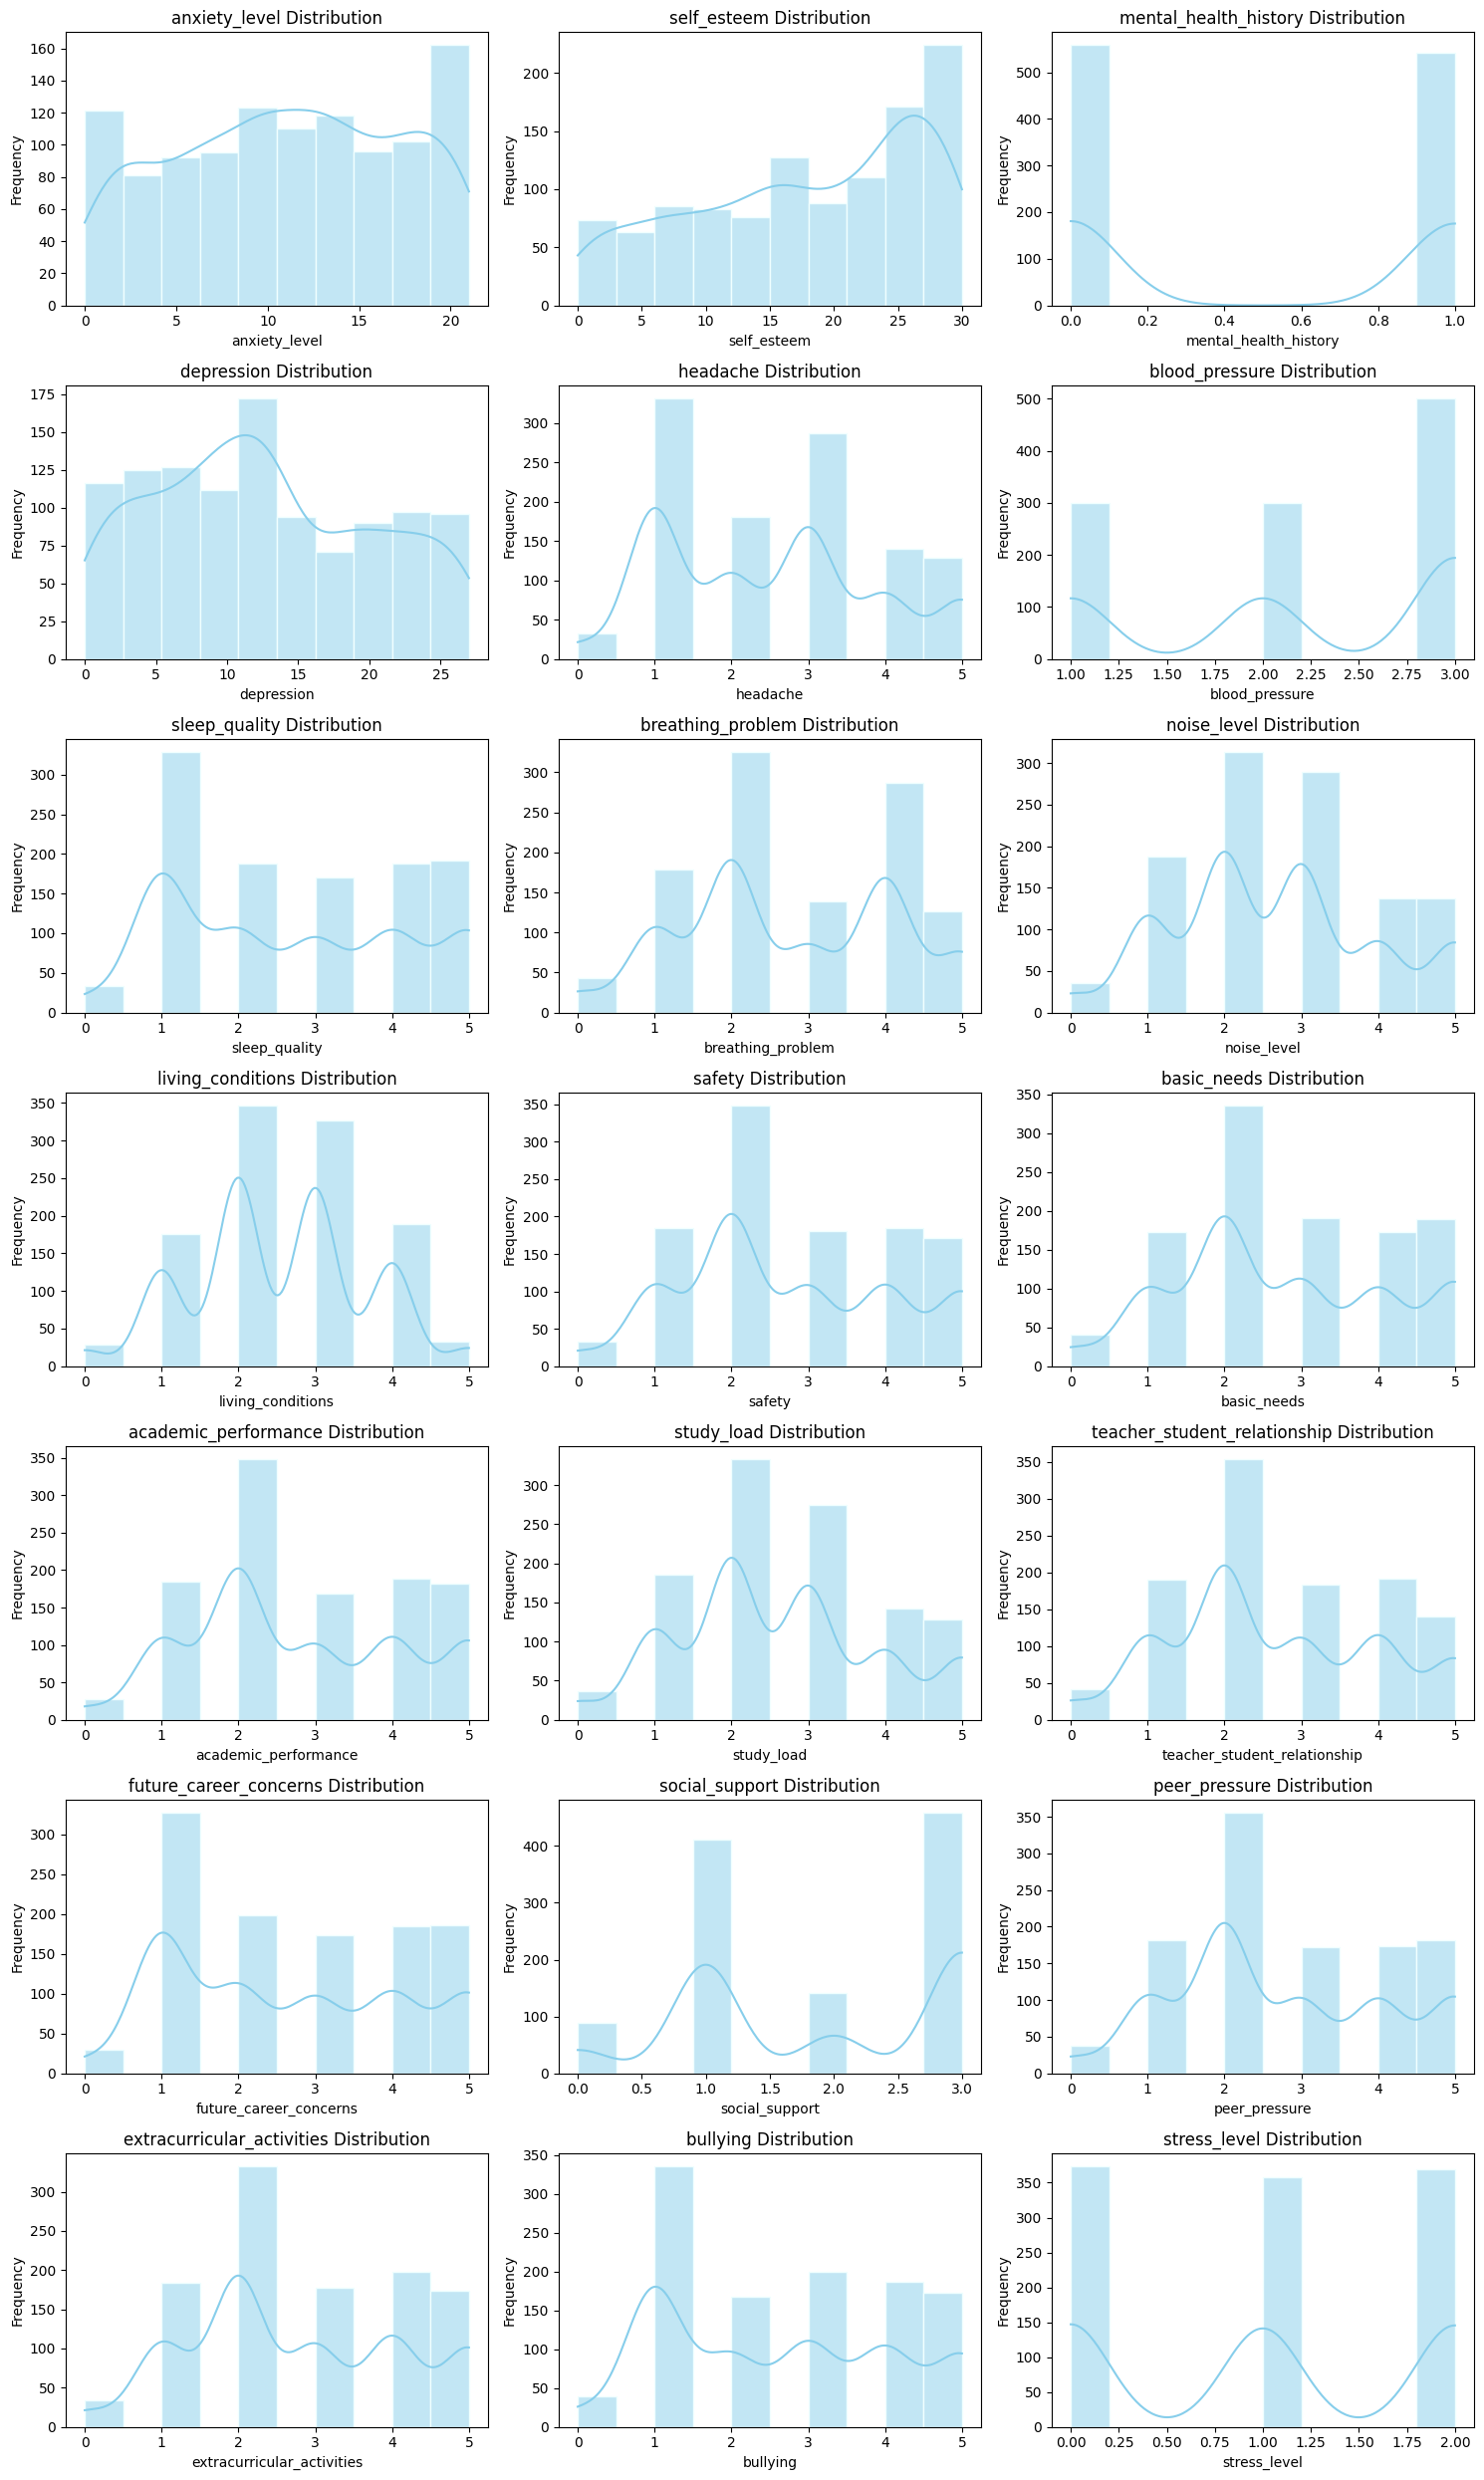

In [ ]:
all_columns = df.columns

n_cols = 3
n_rows = 7

plt.figure(figsize=(15, 25))

for i, col in enumerate(all_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=10, color='skyblue', edgecolor='azure')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Bivariate Analysis

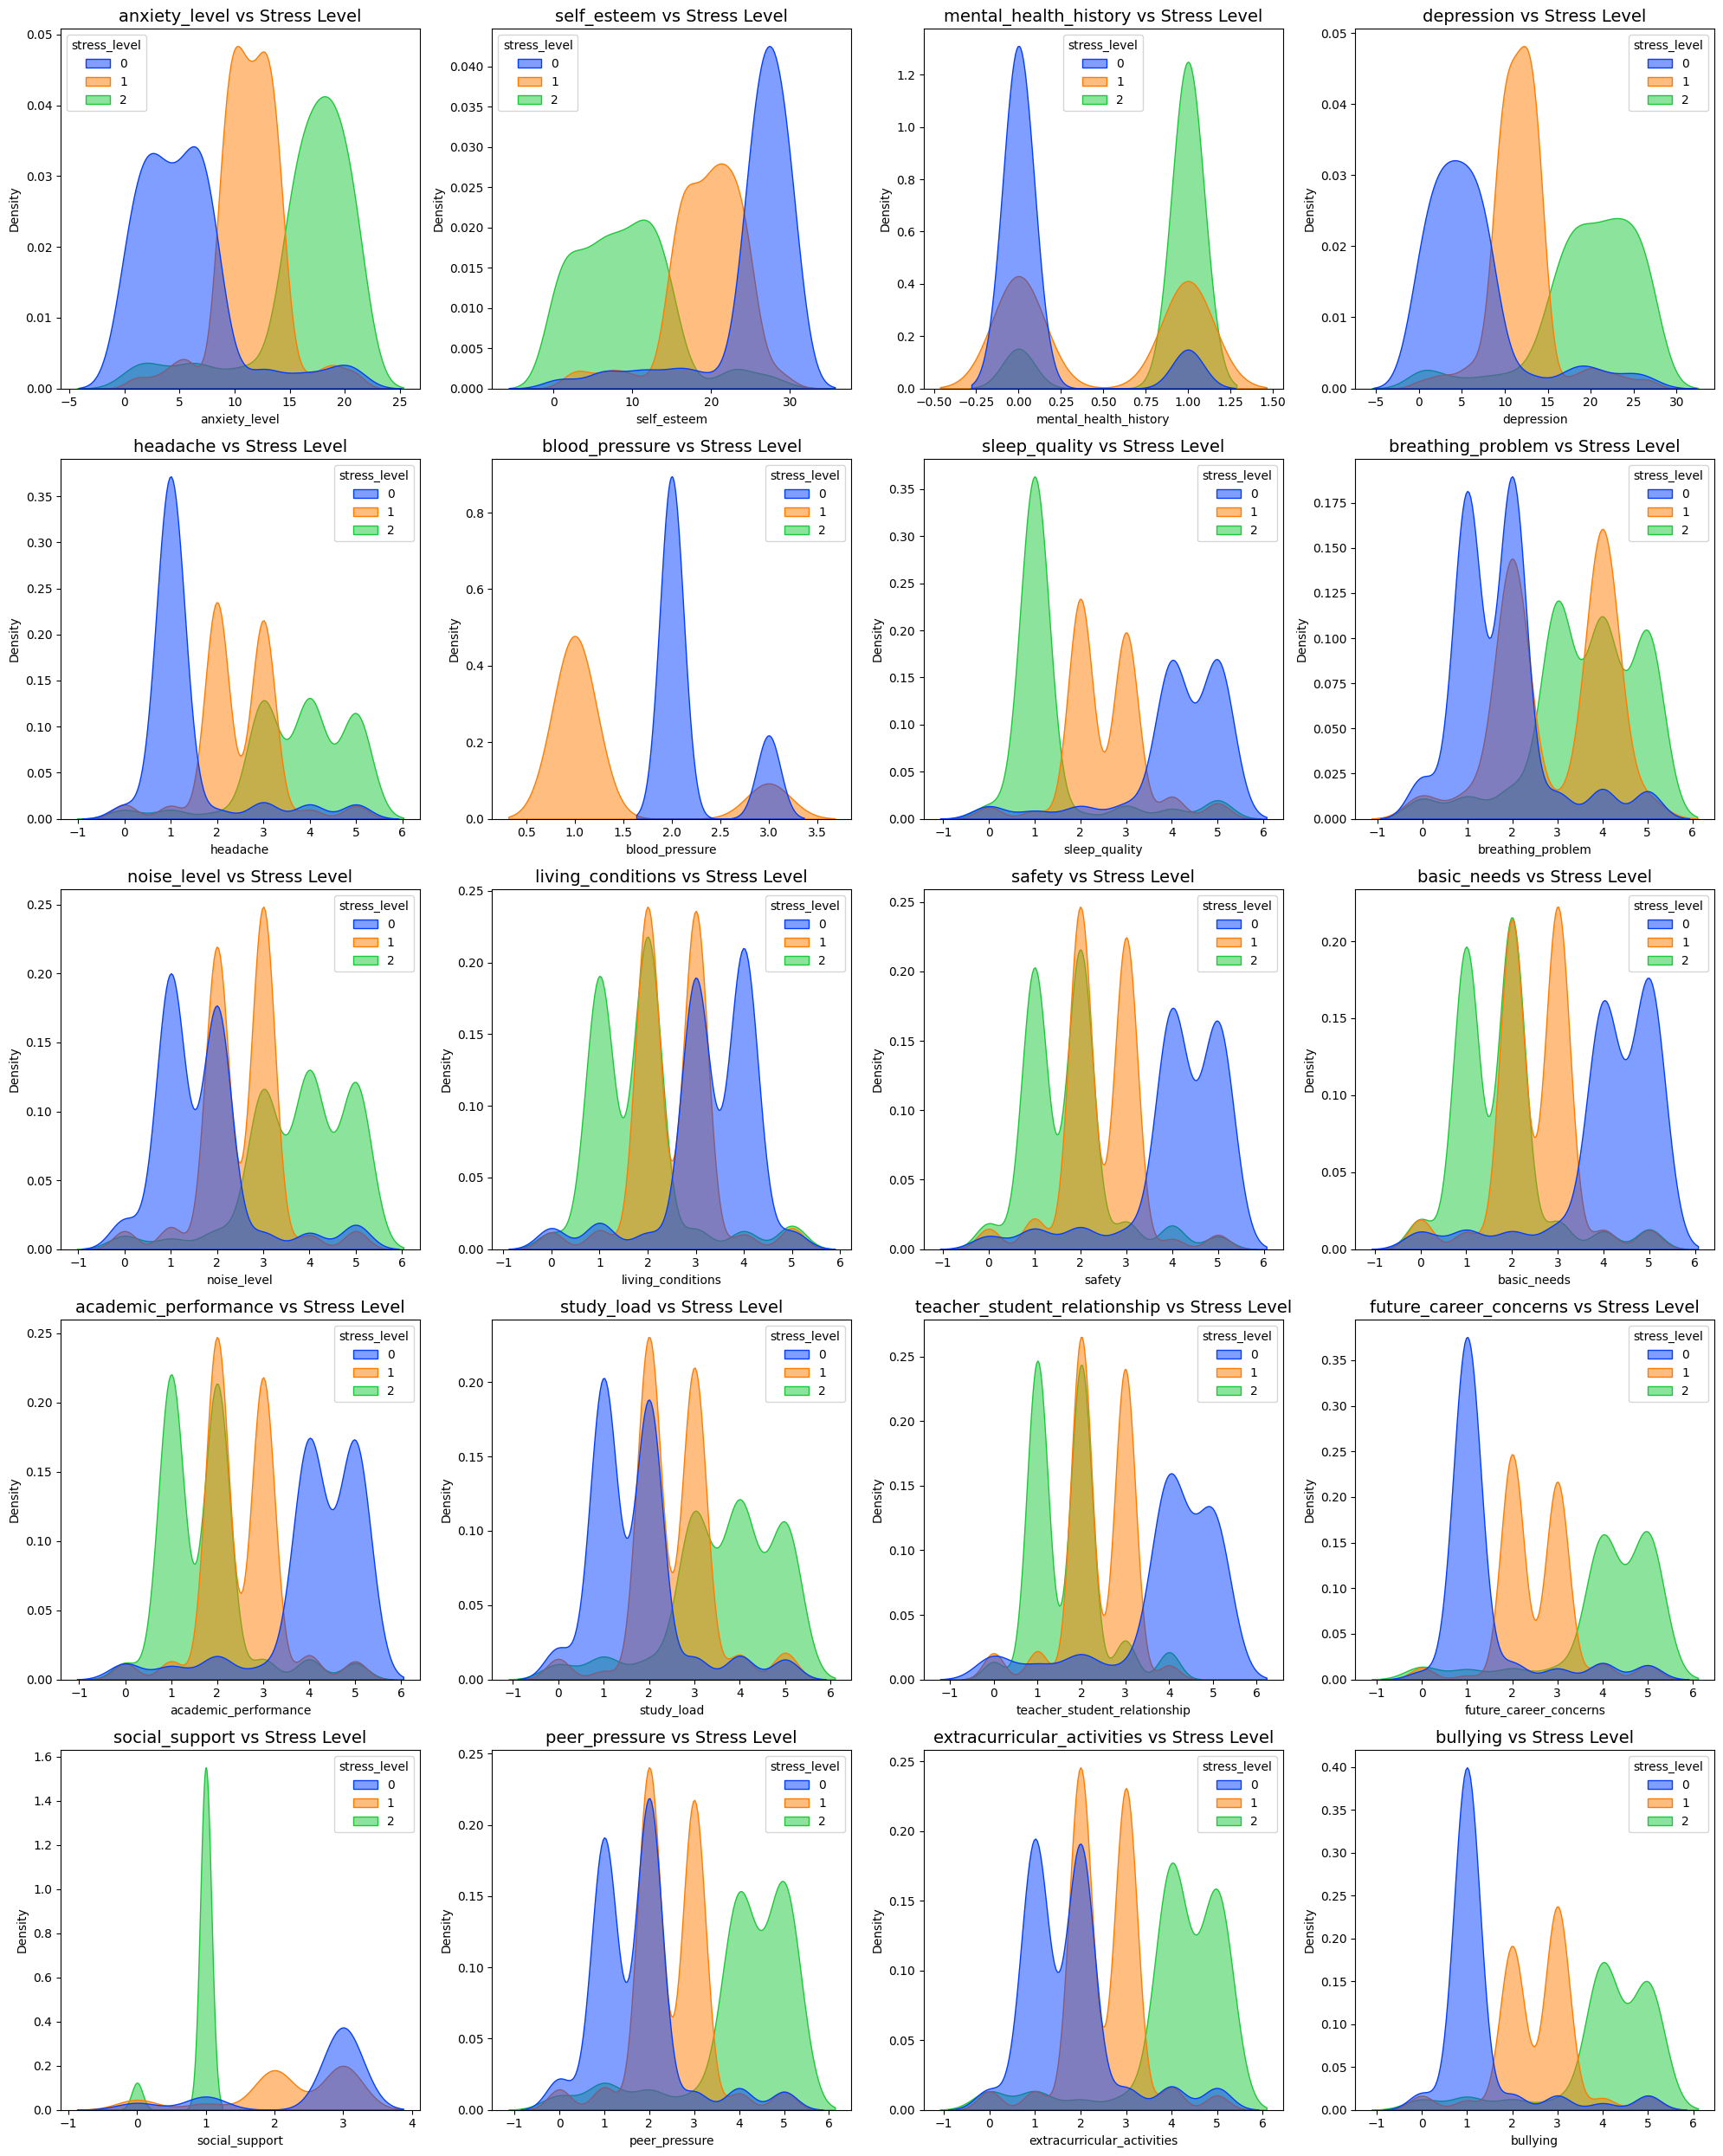

In [ ]:
n_cols = 4
n_rows = 5

plt.figure(figsize=(20, 25))

for i, col in enumerate(feature_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(
        data=df,
        x=col,
        hue='stress_level',
        fill=True,
        palette='bright',
        alpha=0.5,
        warn_singular=False
    )
    plt.title(f'{col} vs Stress Level', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Multivariate Analysis

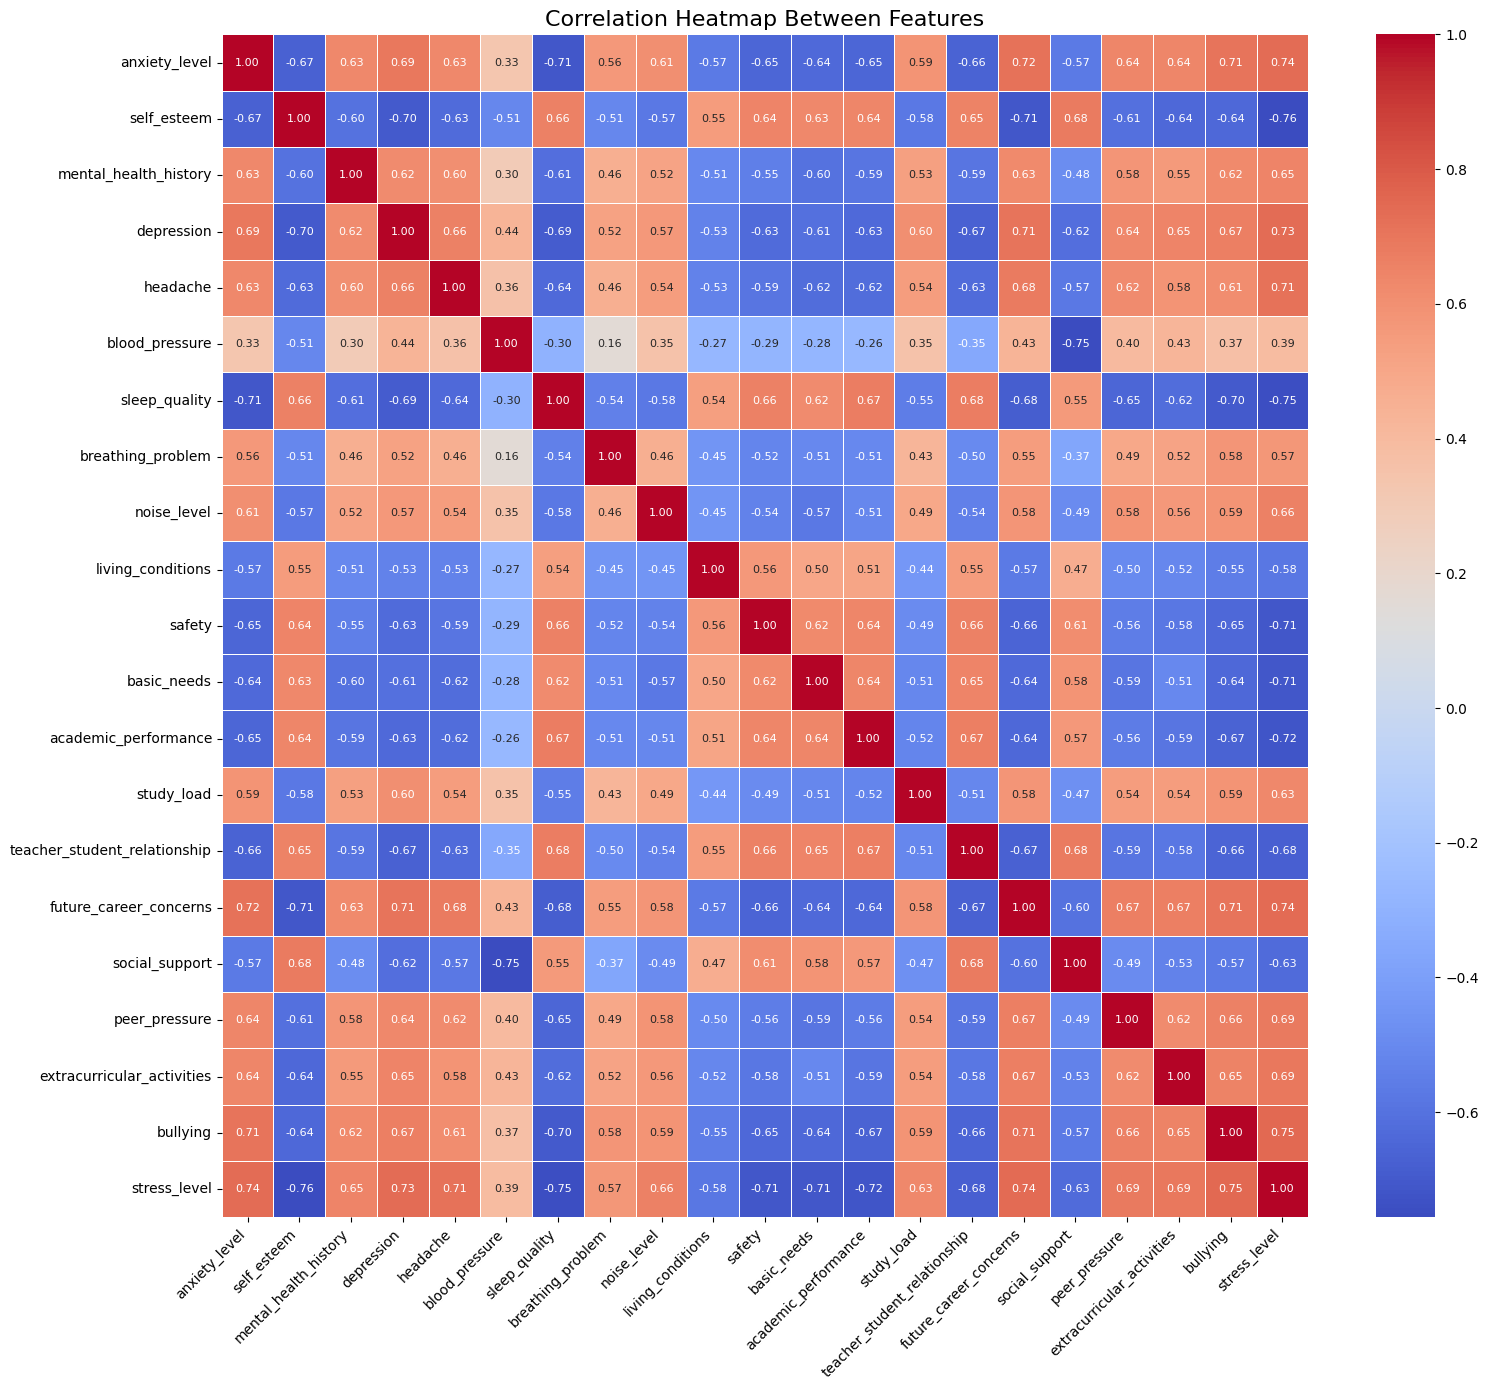

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.title('Correlation Heatmap Between Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Preprocessing

## Identifying Mean, Median, Mode, Kurtosis, and Skewness

In [ ]:
stat_summary = pd.DataFrame(index=df.columns)
stat_summary['Mean'] = df.mean()
stat_summary['Median'] = df.median()
stat_summary['Mode'] = df.mode().iloc[0]
stat_summary['Kurtosis'] = df.kurtosis()
stat_summary['Skewness'] = df.skew()
display(stat_summary)

,Mean,Median,Mode,Kurtosis,Skewness
anxiety_level,11.063636,11.0,13,-1.094132,-0.082612
self_esteem,17.777273,19.0,25,-1.061830,-0.396539
mental_health_history,0.492727,0.0,0,-2.002796,0.029134
depression,12.555455,12.0,10,-0.988845,0.216638
headache,2.508182,3.0,1,-0.996594,0.270494
blood_pressure,2.181818,2.0,3,-1.474031,-0.351186
sleep_quality,2.660000,2.5,1,-1.322049,0.177975
breathing_problem,2.753636,3.0,2,-1.060044,-0.001625
noise_level,2.649091,3.0,2,-0.695764,0.207122
living_conditions,2.518182,2.0,2,-0.496917,0.018794


## Handling Outliers Data

In [ ]:
df_clean = df.copy()

print("=== Handling Outliers Process ===")

feature_cols = df_clean.columns.drop('stress_level')

total_capped = 0

for col in feature_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_before = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()

    if outliers_before > 0:
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

        print(f" {col}: {outliers_before} outliers have been capped.")
        print(f" (Values capped to range: {lower_bound:.2f} - {upper_bound:.2f})\n")

        total_capped += outliers_before

if total_capped == 0:
    print("No outliers found to cap.")
else:
    print(f"Total data points capped: {total_capped}")

=== Handling Outliers Process ===
 noise_level: 173 outliers have been capped.
 (Values capped to range: 0.50 - 4.50)

 living_conditions: 62 outliers have been capped.
 (Values capped to range: 0.50 - 4.50)

 study_load: 165 outliers have been capped.
 (Values capped to range: 0.50 - 4.50)

Total data points capped: 400


### Check for Outliers in a Clean Dataset

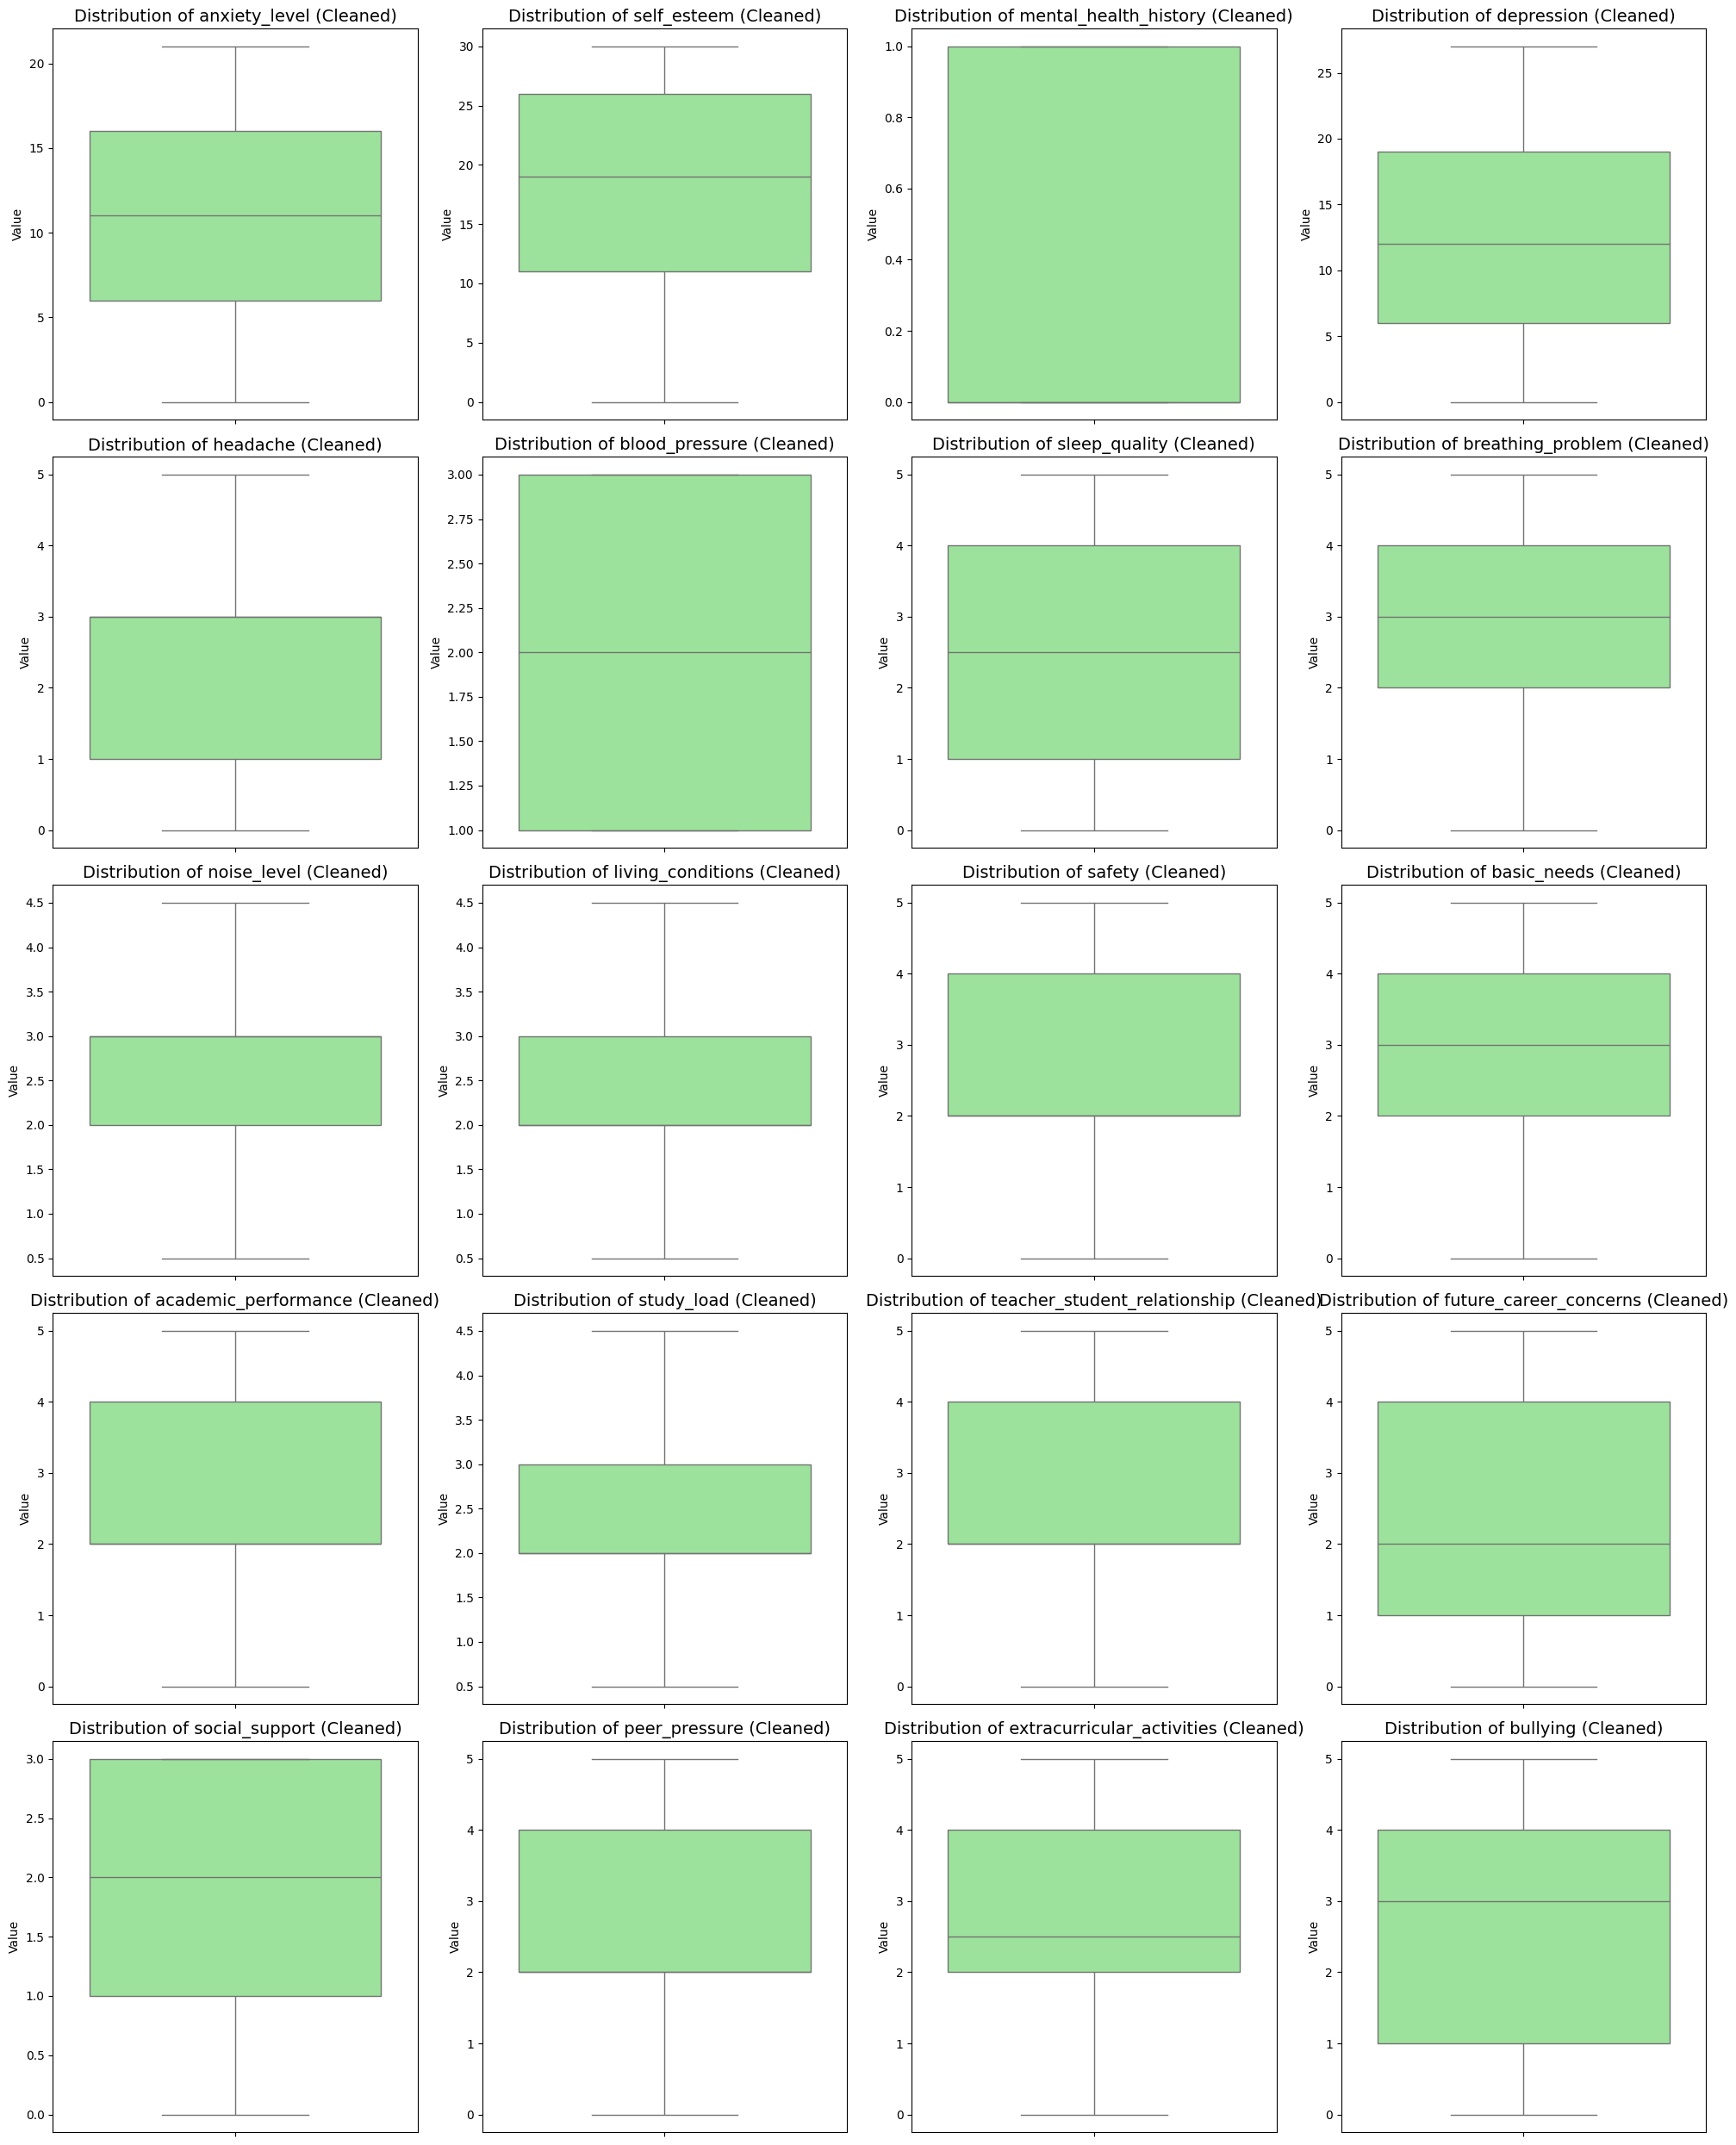


=== Number of Outliers per Column (After Cleaning) ===

Column Name                    | Outliers   | Percentage
------------------------------------------------------------
anxiety_level                  | 0          | 0.00%
self_esteem                    | 0          | 0.00%
mental_health_history          | 0          | 0.00%
depression                     | 0          | 0.00%
headache                       | 0          | 0.00%
blood_pressure                 | 0          | 0.00%
sleep_quality                  | 0          | 0.00%
breathing_problem              | 0          | 0.00%
noise_level                    | 0          | 0.00%
living_conditions              | 0          | 0.00%
safety                         | 0          | 0.00%
basic_needs                    | 0          | 0.00%
academic_performance           | 0          | 0.00%
study_load                     | 0          | 0.00%
teacher_student_relationship   | 0          | 0.00%
future_career_concerns         | 0          |

In [ ]:
n_cols = 4
n_rows = 5

plt.figure(figsize=(20, 25))

for i, column in enumerate(feature_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_clean[column], color='lightgreen')
    plt.title(f'Distribution of {column} (Cleaned)', fontsize=14)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

print("\n=== Number of Outliers per Column (After Cleaning) ===\n")
print(f"{'Column Name':<30} | {'Outliers':<10} | {'Percentage':<10}")
print("-" * 60)

total_outliers = 0

for column in feature_cols:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)).sum()
    percentage = (outliers_count / len(df_clean)) * 100

    print(f"{column:<30} | {outliers_count:<10} | {percentage:.2f}%")

    total_outliers += outliers_count

print("-" * 60)
print(f"\nTotal number of outlier points detected after cleaning: {total_outliers}")

## Basic Statistics

In [ ]:
numeric_features = df_clean.drop('stress_level', axis=1)

stats_df = pd.DataFrame(index=numeric_features.columns)
stats_df['Mean'] = numeric_features.mean()
stats_df['Median'] = numeric_features.median()
stats_df['Mode'] = numeric_features.mode().iloc[0]
stats_df['Min'] = numeric_features.min()
stats_df['Max'] = numeric_features.max()
stats_df['Range'] = numeric_features.max() - numeric_features.min()
stats_df['Variance'] = numeric_features.var()
stats_df['Std Dev'] = numeric_features.std()
stats_df['Kurtosis'] = numeric_features.kurt()
stats_df['Skewness'] = numeric_features.skew()

display(stats_df.style.format("{:.4f}"))

,Mean,Median,Mode,Min,Max,Range,Variance,Std Dev,Kurtosis,Skewness
anxiety_level,11.0636,11.0000,13.0000,0.0000,21.0000,21.0000,37.4245,6.1176,-1.0941,-0.0826
self_esteem,17.7773,19.0000,25.0000,0.0000,30.0000,30.0000,80.0059,8.9446,-1.0618,-0.3965
mental_health_history,0.4927,0.0000,0.0000,0.0000,1.0000,1.0000,0.2502,0.5002,-2.0028,0.0291
depression,12.5555,12.0000,10.0000,0.0000,27.0000,27.0000,59.7067,7.7270,-0.9888,0.2166
headache,2.5082,3.0000,1.0000,0.0000,5.0000,5.0000,1.9863,1.4094,-0.9966,0.2705
blood_pressure,2.1818,2.0000,3.0000,1.0000,3.0000,2.0000,0.6948,0.8336,-1.4740,-0.3512
sleep_quality,2.6600,2.5000,1.0000,0.0000,5.0000,5.0000,2.3975,1.5484,-1.3220,0.1780
breathing_problem,2.7536,3.0000,2.0000,0.0000,5.0000,5.0000,1.9620,1.4007,-1.0600,-0.0016
noise_level,2.6032,3.0000,2.0000,0.5000,4.5000,4.0000,1.4213,1.1922,-1.0654,0.0797
living_conditions,2.5164,2.0000,2.0000,0.5000,4.5000,4.0000,1.1258,1.0610,-0.9298,0.0097


## Export Clean Dataset

In [ ]:
df_clean.to_csv('student_stress_levels_clean.csv', index=False)

# Data Modeling

## Splitting Data

In [ ]:
x = df_clean.drop('stress_level', axis=1)
y = df_clean['stress_level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("=== Split Data Results ===")
print(f" Original Data      : {x.shape[0]} rows")
print(f" Data Training (80%): {x_train.shape[0]} rows")
print(f" Data Testing (20%) : {x_test.shape[0]} rows")

print("\n=== Dimension Data ===")
print(f" x_train: {x_train.shape}")
print(f" y_train: {y_train.shape}")
print(f" x_test : {x_test.shape}")
print(f" y_test : {y_test.shape}")

print("\n=== Class Distribution Check ===")
print("Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\nDistribution in Testing Set:")
print(y_test.value_counts(normalize=True))

=== Split Data Results ===
 Original Data      : 1100 rows
 Data Training (80%): 880 rows
 Data Testing (20%) : 220 rows

=== Dimension Data ===
 x_train: (880, 20)
 y_train: (880,)
 x_test : (220, 20)
 y_test : (220,)

=== Class Distribution Check ===
Distribution in Training Set:
stress_level
0    0.339773
2    0.335227
1    0.325000
Name: proportion, dtype: float64

Distribution in Testing Set:
stress_level
0    0.336364
2    0.336364
1    0.327273
Name: proportion, dtype: float64


## Training Model

In [ ]:
class_names = {
    0: 'Low Stress',
    1: 'Moderate Stress',
    2: 'High Stress'
}

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

print("Training Successfully Completed")
print(f"The model is now ready to classify stress levels: {class_names}")

Training Successfully Completed
The model is now ready to classify stress levels: {0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Stress'}


# Model Evaluation

## Classification Report

In [ ]:
y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"=== Random Forest Model ===")
print(f" Model Accuracy: {accuracy:.2%}")

target_names = ['Low Stress (0)', 'Moderate Stress (1)', 'High Stress (2)']

report = classification_report(y_test, y_pred, target_names=target_names)

print("\n Classification Report:")
print(report)

=== Random Forest Model ===
 Model Accuracy: 89.09%

 Classification Report:
                     precision    recall  f1-score   support

     Low Stress (0)       0.93      0.84      0.88        74
Moderate Stress (1)       0.89      0.93      0.91        72
    High Stress (2)       0.86      0.91      0.88        74

           accuracy                           0.89       220
          macro avg       0.89      0.89      0.89       220
       weighted avg       0.89      0.89      0.89       220



## Confusion Matrix

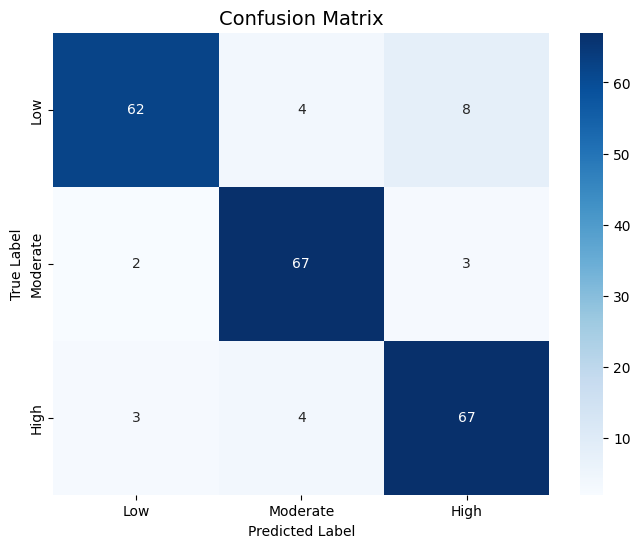

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

labels = ['Low', 'Moderate', 'High']

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Cross Validation

In [ ]:
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, x_train, y_train, cv=cv_method, scoring='accuracy')

print("=== Cross Validation Results ===")

for i, score in enumerate(scores, 1):
    print(f" Fold {i}: {score:.4f} ({score:.2%})")

mean_score = scores.mean()
std_dev = scores.std()

print(f"\n Average Score     : {mean_score:.4f} ({mean_score:.2%})")
print(f" Standard Deviation: {std_dev:.4f}")

if std_dev < 0.05:
    print("\nResult: The model is STABLE (low variance).")
else:
    print("\nResult: The model might be UNSTABLE (high variance).")

=== Cross Validation Results ===
 Fold 1: 0.8920 (89.20%)
 Fold 2: 0.8977 (89.77%)
 Fold 3: 0.8352 (83.52%)
 Fold 4: 0.8466 (84.66%)
 Fold 5: 0.8864 (88.64%)

 Average Score     : 0.8716 (87.16%)
 Standard Deviation: 0.0256

Result: The model is STABLE (low variance).


## Identifying Overfitting and Underfitting

In [ ]:
train_score = rf_model.score(x_train, y_train)
test_score = rf_model.score(x_test, y_test)
score_diff = train_score - test_score

print("=== Model Performance Analysis ===")
print(f" Training Accuracy: {train_score:.2%}")
print(f" Testing Accuracy : {test_score:.2%}")
print(f" Difference (Gap) : {score_diff:.2%}")

print("\n=== Diagnosis ===")

if train_score < 0.60:
    print(" Status: UNDERFITTING")
    print(" Reason: The model performed poorly on both training and testing data.")
elif score_diff > 0.05:
    print(" Status: OVERFITTING")
    print(" Reason: The training score is high but the testing score is much lower.")
else:
    print(" Status: GOOD FIT")
    print(" Reason: The difference between the training score and the testing score is small.")

=== Model Performance Analysis ===
 Training Accuracy: 100.00%
 Testing Accuracy : 89.09%
 Difference (Gap) : 10.91%

=== Diagnosis ===
 Status: OVERFITTING
 Reason: The training score is high but the testing score is much lower.


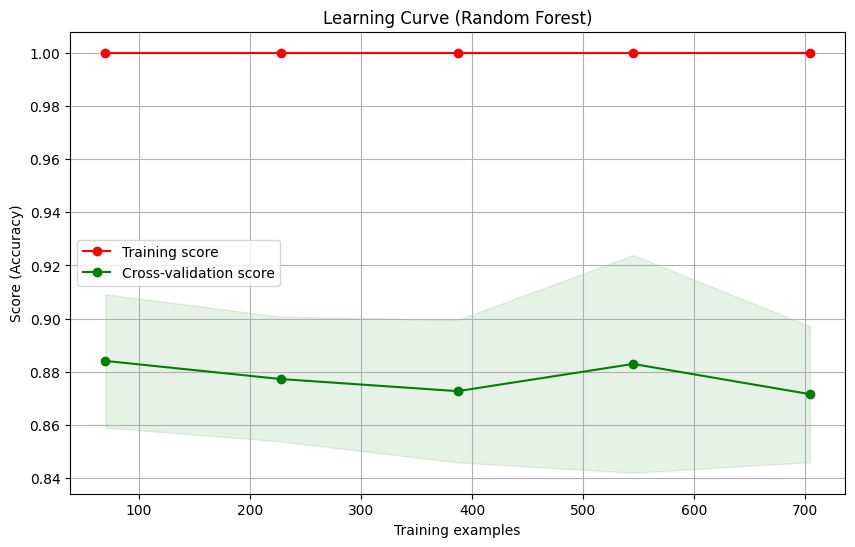

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score (Accuracy)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(rf_model, "Learning Curve (Random Forest)", x_train, y_train, cv=cv_method, n_jobs=-1)

## Feature Importance

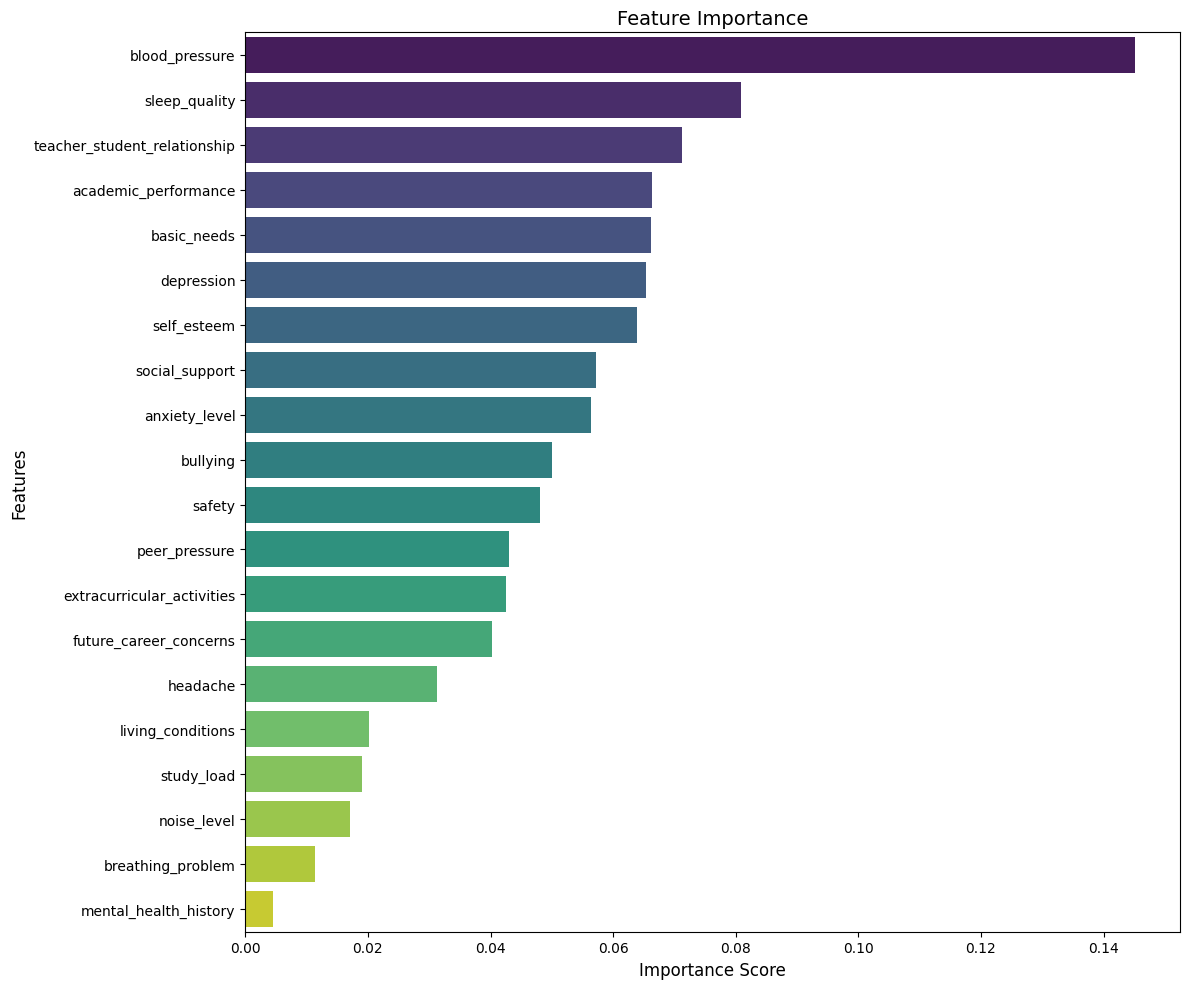

In [ ]:
importances = rf_model.feature_importances_
feature_names = x_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df,
    palette='viridis',
    hue='Feature',
    legend=False
)
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [ ]:
param_grid_tuned = {
    'n_estimators': [100, 200],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [10, 20, 30],
    'min_samples_split': [30, 50, 80],
    'max_features': ['sqrt', 'log2']
}

rf_base = RandomForestClassifier(random_state=42)

grid_search_tuned = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_tuned,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)
grid_search_tuned.fit(x_train, y_train)

best_rf_tuned = grid_search_tuned.best_estimator_

print("\nBest Tuned Parameters:")
print(grid_search_tuned.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Tuned Parameters:
{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 100}


# Final Evaluation

## Classification Report (Tuned)

In [ ]:
model_to_test = best_rf_tuned

y_pred_tuned = model_to_test.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"=== Random Forest Model (Tuned) ===")
print(f" Model Accuracy: {accuracy:.2%}")

target_names = ['Low Stress (0)', 'Moderate Stress (1)', 'High Stress (2)']

report = classification_report(y_test, y_pred_tuned, target_names=target_names)

print("\n Classification Report (Tuned):")
print(report)

=== Random Forest Model (Tuned) ===
 Model Accuracy: 88.18%

 Classification Report (Tuned):
                     precision    recall  f1-score   support

     Low Stress (0)       0.90      0.81      0.85        74
Moderate Stress (1)       0.94      0.89      0.91        72
    High Stress (2)       0.82      0.95      0.88        74

           accuracy                           0.88       220
          macro avg       0.89      0.88      0.88       220
       weighted avg       0.89      0.88      0.88       220



## Confusion Matrix (Tuned)

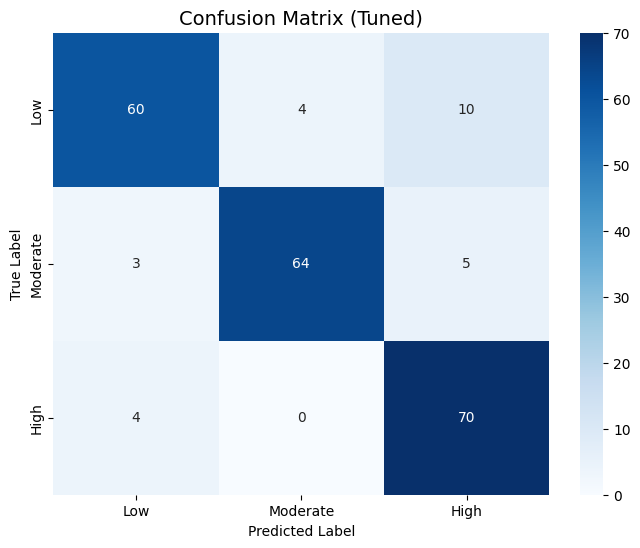

In [ ]:
y_pred_tuned = best_rf_tuned.predict(x_test)

cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8, 6))

labels = ['Low', 'Moderate', 'High']

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)

plt.title('Confusion Matrix (Tuned)', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Cross Validation (Tuned)

In [ ]:
model_to_validate = best_rf_tuned

cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_tuned = cross_val_score(model_to_validate, x_train, y_train, cv=cv_method, scoring='accuracy')

print("=== Cross Validation Results (Tuned) ===")

for i, score in enumerate(scores_tuned, 1):
    print(f" Fold {i}: {score:.4f} ({score:.2%})")

mean_score = scores_tuned.mean()
std_dev = scores_tuned.std()

print(f"\n Average Score     : {mean_score:.4f} ({mean_score:.2%})")
print(f" Standard Deviation: {std_dev:.4f}")

if std_dev < 0.05:
    print("\nResult: The tuned model is STABLE (low variance).")
else:
    print("\nResult: The tuned model might be UNSTABLE (high variance).")

=== Cross Validation Results (Tuned) ===
 Fold 1: 0.9148 (91.48%)
 Fold 2: 0.9148 (91.48%)
 Fold 3: 0.8523 (85.23%)
 Fold 4: 0.8750 (87.50%)
 Fold 5: 0.8807 (88.07%)

 Average Score     : 0.8875 (88.75%)
 Standard Deviation: 0.0242

Result: The tuned model is STABLE (low variance).


## Identifying Overfitting and Underfitting (Tuned)

In [ ]:
model_to_check = best_rf_tuned

train_score = model_to_check.score(x_train, y_train)
test_score = model_to_check.score(x_test, y_test)
score_diff = train_score - test_score

print("=== Model Performance Analysis (Tuned) ===")
print(f" Training Accuracy: {train_score:.2%}")
print(f" Testing Accuracy : {test_score:.2%}")
print(f" Difference (Gap) : {score_diff:.2%}")

print("\n=== Diagnosis ===")

if train_score < 0.60:
    print(" Status: UNDERFITTING")
    print(" Reason: The model performed poorly on both training and testing data.")
elif score_diff > 0.05:
    print(" Status: POTENTIAL OVERFITTING")
    print(" Reason: The training score is high but the testing score is much lower.")
else:
    print(" Status: GOOD FIT")
    print(" Reason: The difference between the training score and the testing score is small.")

=== Model Performance Analysis (Tuned) ===
 Training Accuracy: 89.66%
 Testing Accuracy : 88.18%
 Difference (Gap) : 1.48%

=== Diagnosis ===
 Status: GOOD FIT
 Reason: The difference between the training score and the testing score is small.


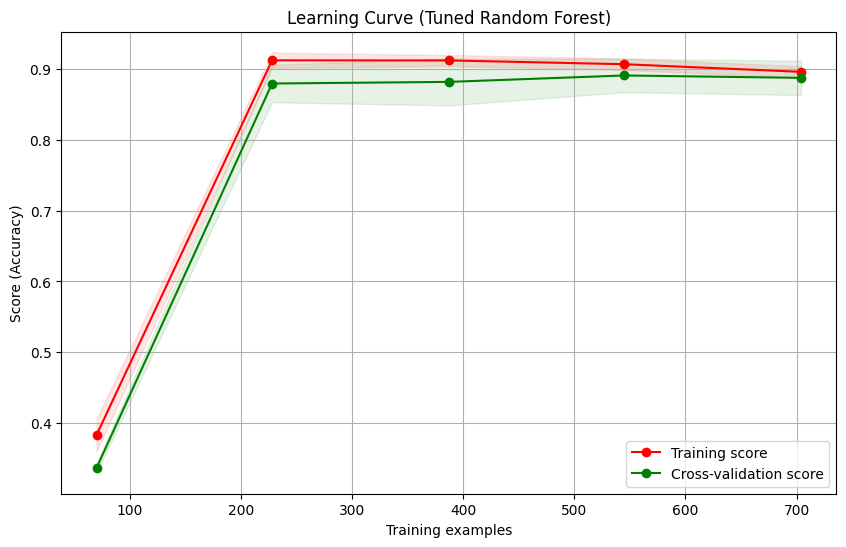

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score (Accuracy)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(best_rf_tuned, "Learning Curve (Tuned Random Forest)", x_train, y_train, cv=cv_method, n_jobs=-1)

## Feature Importance (Tuned)

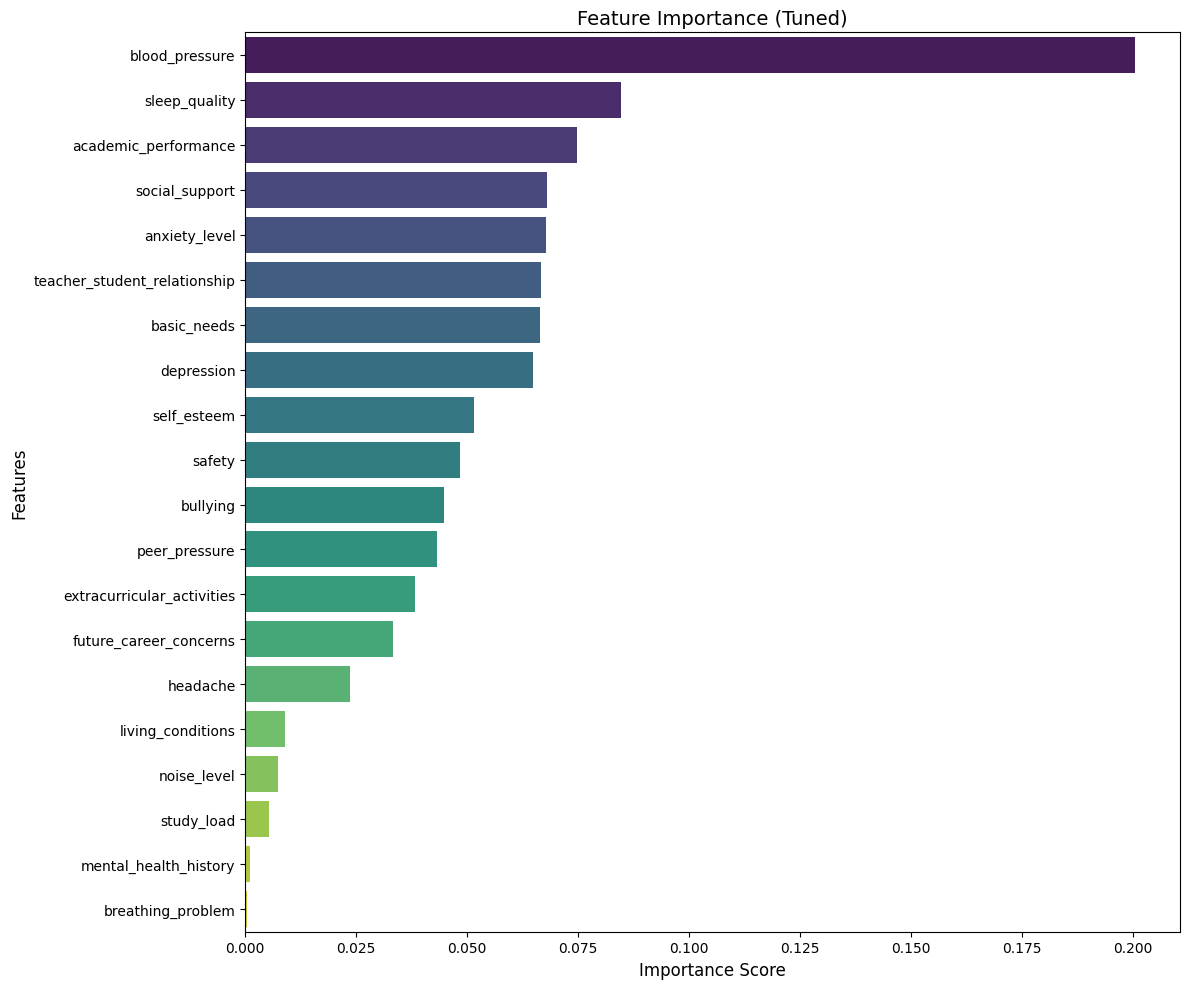

In [ ]:
model_to_viz = best_rf_tuned

importances = model_to_viz.feature_importances_
feature_names = x_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df,
    palette='viridis',
    hue='Feature',
    legend=False
)
plt.title('Feature Importance (Tuned)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()